<a href="https://colab.research.google.com/github/vparro/sinais/blob/master/Voz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
###################################################################################################
#  Bibliotecas gerais
#  Instalação

!pip install xlrd

In [ ]:
###################################################################################################
#  Bibliotecas gerais
#  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from numpy.linalg import matrix_rank

In [ ]:
###################################################################################################
#  Bibliotecas gráfica
#  Instalação

!pip install -U plotly
# !pip install plotly==4.8.1

# organização da planilha excel

!pip install nltk

# Exportando figuras com melhores resoluções

!pip install -U kaleido

!add-apt-repository -y ppa:cran/poppler
!apt-get update
!apt-get install -y libpoppler-cpp-dev
!apt-get install poppler-utils

     |████████████████████████████████| 13.2MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9MB 86kB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:

In [ ]:
###################################################################################################
#  Bibliotecas gráfica
# 
# 

import plotly.express as px
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Diretório de imagens
import os
if not os.path.exists("images"):
    os.mkdir("images")


## **Controle**

In [ ]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# Instalação

!git clone https://github.com/python-control/python-control.git

!pip install slycot   # optional
!pip install control



Cloning into 'python-control'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 7304 (delta 126), reused 111 (delta 74), pack-reused 7120
Receiving objects: 100% (7304/7304), 7.42 MiB | 20.76 MiB/s, done.
Resolving deltas: 100% (5434/5434), done.
     |████████████████████████████████| 1.6MB 5.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417830 sha256=ee3894a9810d9434b19a7bcf70e9a44268de2e68e13c1890ebc12cf5fd2d92eb
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 348kB 5.3MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=fa481e0288f07812fafa5f9

In [ ]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# 

import control
from control import impulse_response, step_response


# **Funções proprietárias**

In [ ]:
def graphics_plot(x, y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  for i, v in enumerate(y):
    
    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if i == 0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2)),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2,dash=dash[i-1])),
          # line_shape='spline'),
          secondary_y=on)
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Ano relativo')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

## **Geração de elipses para o resultado do GMM**

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
   
    ax = ax or plt.gca()
    
    # Rotaciona o conjunto de dados para alinhamento com a convariância
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Cria e elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# **Dados**

In [ ]:
###################################################################################################
# Lendo os dados

vogais = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLprobabilistico/Vogais.csv")
vogais.head()

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,F3
0,1,1,1,IY,160,240,2280,2850
1,1,1,1,IY,186,280,2400,2790
2,1,1,2,IH,203,390,2030,2640
3,1,1,2,IH,192,310,1980,2550
4,1,1,3,EH,161,490,1870,2420


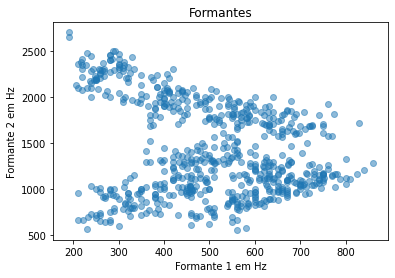

In [ ]:
###################################################################################################
# Análise elementar dos dados

### Análise por genero

Homem   = vogais['Genero'] == 1
Mulher  = vogais['Genero'] == 2
Crianca = vogais['Genero'] == 3

vogais[Homem].describe()
vogais[Mulher].describe()
vogais[Crianca].describe()

### Separando os dataframes por genero

vogaisH = vogais[Homem]
vogaisM = vogais[Mulher]
vogaisC = vogais[Crianca]

### Capturando os tipos de fonemas

fonemas = vogais['Fonema'].unique()

### Analisando o espalhamento ntre os homens para o primeiro fonema

formante1 = np.array(vogais['f1'][Homem])
formante2 = np.array(vogais['f2'][Homem])

### Gráficamente

plt.scatter(formante1, formante2, alpha=0.5)
plt.title('Formantes')
plt.xlabel('Formante 1 em Hz')
plt.ylabel('Formante 2 em Hz')
plt.show()

In [ ]:
###################################################################################################
# Codifica os fonemas

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
vogais["Codigo"] = ord_enc.fit_transform(vogais[["Fonema"]])

In [ ]:
###################################################################################################
# Visualiza os dados

import plotly.express as px
df = vogaisH
plt.figure(figsize=(15,7))
fig = px.scatter(df, x="f1", y="f2", color="Fonema")

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
fig.show()

<Figure size 1080x504 with 0 Axes>

# **Separando os fonemas**

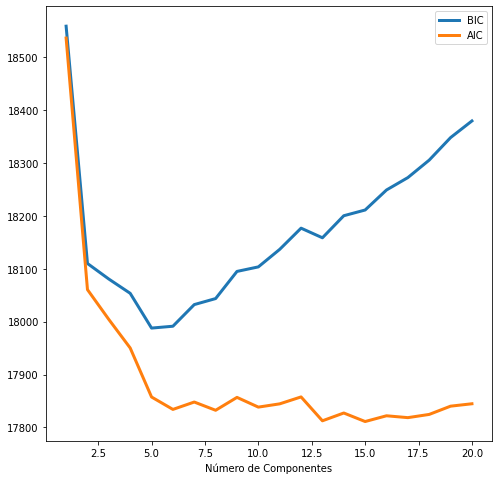

In [ ]:
Freq = np.array([formante1,formante2]).T

###################################################################################################
# Gaussian Mixtures

from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Freq)
          for n in n_components]
plt.figure(figsize = (8,8))
plt.plot(n_components, [m.bic(Freq) for m in models], label='BIC',linewidth = "3")
plt.plot(n_components, [m.aic(Freq) for m in models], label='AIC',linewidth = "3")
plt.legend(loc='best')
plt.xlabel('Número de Componentes');

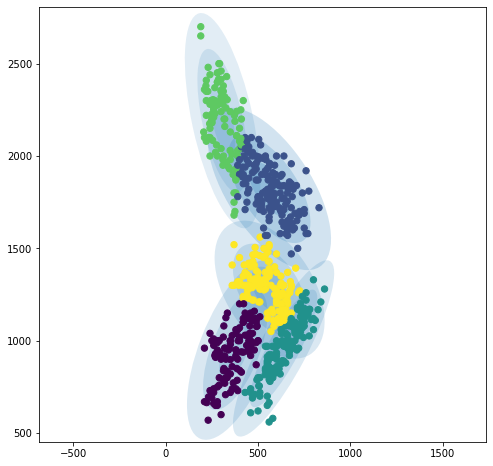

In [ ]:
###################################################################################################
# Gaussian Mixtures - visualização

from matplotlib.patches import Ellipse

gmm2 = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
plt.figure(figsize = (8,8))
plot_gmm(gmm2, Freq)

In [ ]:
gmm2.fit_predict(Freq, y=None)

array([3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 0, 3, 3, 1, 1,
       1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1,
       4, 4, 2, 4, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 1, 3, 1, 1, 1, 1, 4, 4,
       2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2,
       2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 2, 4, 2, 2,
       0, 4, 0, 0, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0,
       0, 0, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0,
       4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4,
       3, 3, 1, 3, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 4, 0, 0, 4, 4, 3, 3,
       1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 3, 1,
       1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 3,

In [ ]:
vogais.head(8)

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,F3,Codigo
0,1,1,1,IY,160,240,2280,2850,17.0
1,1,1,1,IY,186,280,2400,2790,17.0
2,1,1,2,IH,203,390,2030,2640,16.0
3,1,1,2,IH,192,310,1980,2550,16.0
4,1,1,3,EH,161,490,1870,2420,14.0
5,1,1,3,*EH,155,570,1700,2600,4.0
6,1,1,4,*AE,140,560,1820,2660,1.0
7,1,1,4,AE,180,630,1700,2550,11.0


# **Referências**

https://www.fon.hum.uva.nl/praat/

https://rdrr.io/cran/phonTools/man/pb52.html#heading-3

http://my.ilstu.edu/~jsawyer/consonantsvowels3/consonantsvowels24.html